# PROBLEM STATEMENT:
aim is to build a predictive model and find out the sale of each product at aa particular store.

some of the hypothesis of the problem :
1. MARKET VALUE: the sale of the stores is higher at those place where the marketing division is high.
2. RELATIONSHIP: sales are high where the customer and client behaviour is good.
3. QUALITY: where the quality is fair the sales are higher.
4. OFFERS: products with best or attractive offers and discounts will sell more.
5. BRAND: Branded products have higher sales because of higher trust in the customer.
6. OUTLET SIZE: stores which have big in size should have higher sales because in same outlet people will get all the things        whats they want.
7. DEMAND: if the store located in that area where the product demand is high then the sales of the store must be high.
8. DECORATION : stores which are wll maintained and managed are expected to have higher sales.
9. ADVERTISEMENT: there are more chances of selling those products which are advertised among the public.
10. BUDGET FRIENDLY: where the price is less and public get good quality of product then the sales of that store definitely        high. 

In [392]:
import pandas as pd
import numpy as np

In [393]:
# read the files:


In [394]:
df = pd.read_csv('Test.csv')
df2= pd.read_csv('Train.csv')

In [395]:
df.shape

(5681, 11)

In [396]:
df2.shape

(8523, 12)

In [443]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'source', 'Item_Outlet_Sales'],
      dtype='object')

In [444]:
df2.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source'],
      dtype='object')

In [399]:
# merge train and test data for exploratory data analysis

In [400]:
df['source']='Test'
df2['source']='Train'
df['Item_Outlet_Sales']= 0
data = pd.concat([df,df2],sort = False)
#print(df.head())
#print(df2.head())
print(df.shape,df2.shape,data.shape)

(5681, 13) (8523, 13) (14204, 13)


In [401]:
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,source,Item_Outlet_Sales
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,Test,0
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,Test,0
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,Test,0
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,Test,0
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,Test,0


In [402]:
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,Train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Train


In [403]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681,1308.865489
std,4.652502,0.051459,62.086938,8.371664,1699.791423
min,4.555000,0.000000,31.290000,1985.000000,0.000000
25%,8.710000,0.027036,94.012000,1987.000000,0.000000
50%,12.600000,0.054021,142.247000,1999.000000,559.272000
75%,16.750000,0.094037,185.855600,2004.000000,2163.184200
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [404]:
data['Item_Outlet_Sales'].describe()

count    14204.000000
mean      1308.865489
std       1699.791423
min          0.000000
25%          0.000000
50%        559.272000
75%       2163.184200
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [405]:
import seaborn as sns

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

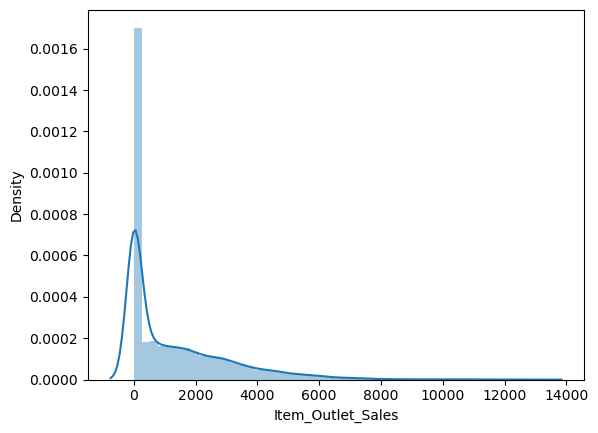

In [435]:
sns.distplot(data['Item_Outlet_Sales'])

In [407]:
data['Item_Outlet_Sales'].mean(),data['Item_Outlet_Sales'].median()

(1308.8654893269527, 559.272)

here mean>median
which means positive skewness


by the above graph we can easily see that data is deviated from the normal distribution.
Have apprreciable positive skewness.

In [408]:
print('Skewness: %f' % data['Item_Outlet_Sales'].skew())
print('Kurtsis: %f' %data['Item_Outlet_Sales'].kurt())

Skewness: 1.544684
Kurtsis: 2.419439


In [409]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
source                        object
Item_Outlet_Sales            float64
dtype: object

In [410]:
categorical_features = data.select_dtypes(include=[np.object])
categorical_features

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12260\578711771.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features = data.select_dtypes(include=[np.object])


,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FDW58,Low Fat,Snack Foods,OUT049,Medium,Tier 1,Supermarket Type1,Test
1,FDW14,reg,Dairy,OUT017,NaN,Tier 2,Supermarket Type1,Test
2,NCN55,Low Fat,Others,OUT010,NaN,Tier 3,Grocery Store,Test
3,FDQ58,Low Fat,Snack Foods,OUT017,NaN,Tier 2,Supermarket Type1,Test
4,FDY38,Regular,Dairy,OUT027,Medium,Tier 3,Supermarket Type3,Test
...,...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1,Train
8519,FDS36,Regular,Baking Goods,OUT045,NaN,Tier 2,Supermarket Type1,Train
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1,Train
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2,Train


In [411]:
numerical_features = data.select_dtypes([np.number])
numerical_features

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,20.750,0.007565,107.8622,1999,0.0000
1,8.300,0.038428,87.3198,2007,0.0000
2,14.600,0.099575,241.7538,1998,0.0000
3,7.315,0.015388,155.0340,2007,0.0000
4,NaN,0.118599,234.2300,1985,0.0000
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


In [436]:
categorical_features= categorical_features.drop(['Item_Identifier','Outlet_Identifier'], axis=1)
categorical_features

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,Low Fat,Snack Foods,Medium,Tier 1,Supermarket Type1,Test
1,reg,Dairy,NaN,Tier 2,Supermarket Type1,Test
2,Low Fat,Others,NaN,Tier 3,Grocery Store,Test
3,Low Fat,Snack Foods,NaN,Tier 2,Supermarket Type1,Test
4,Regular,Dairy,Medium,Tier 3,Supermarket Type3,Test
...,...,...,...,...,...,...
8518,Low Fat,Snack Foods,High,Tier 3,Supermarket Type1,Train
8519,Regular,Baking Goods,NaN,Tier 2,Supermarket Type1,Train
8520,Low Fat,Health and Hygiene,Small,Tier 2,Supermarket Type1,Train
8521,Regular,Snack Foods,Medium,Tier 3,Supermarket Type2,Train


<AxesSubplot:>

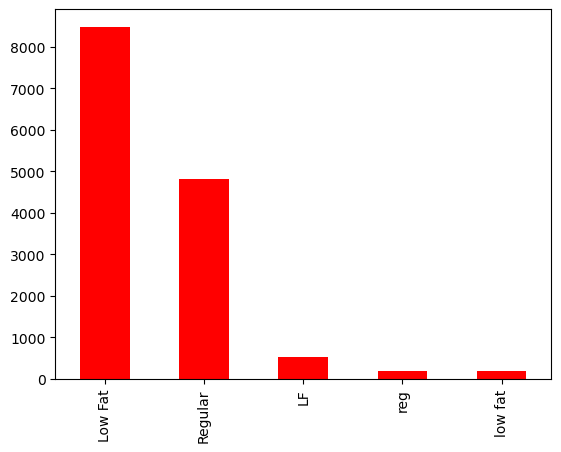

In [413]:
categorical_features['Item_Fat_Content'].value_counts().plot(kind='bar',color = 'red')

In [414]:
#categorical_features = categorical_features.replace(to_replace = 'low fat', value = 'Low Fat' )
#categorical_features = categorical_features.replace(to_replace = 'LF', value = 'Low Fat' )
#categorical_features = categorical_features.replace(to_replace = 'reg', value = 'Regular' )


<AxesSubplot:>

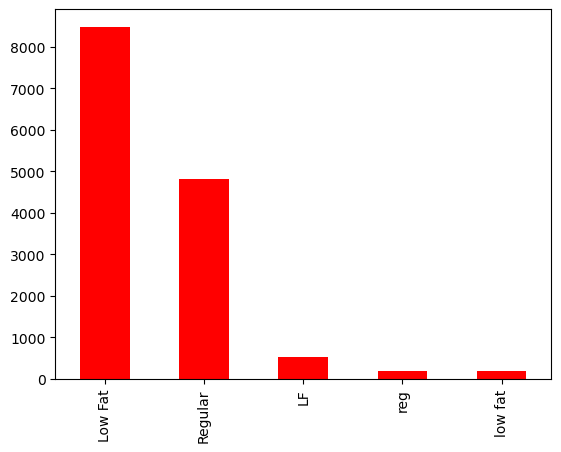

In [415]:
categorical_features['Item_Fat_Content'].value_counts().plot(kind='bar',color = 'red')

2. item_type


<AxesSubplot:>

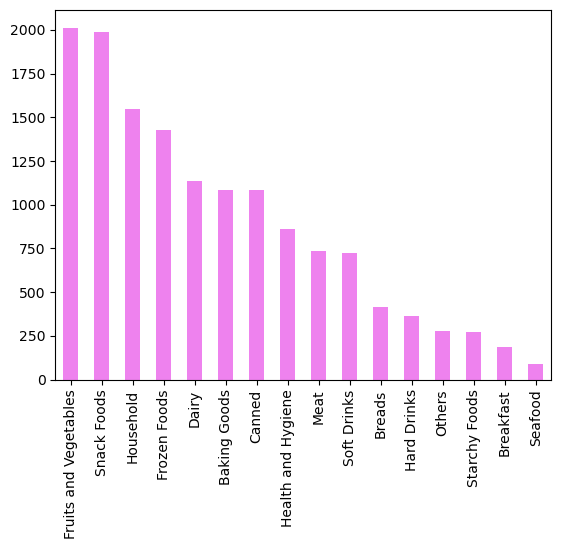

In [416]:
# visualizing the 'Item_Type'
data['Item_Type'].value_counts().plot(kind='bar', color = 'violet')

3. Outlet_Size

<AxesSubplot:>

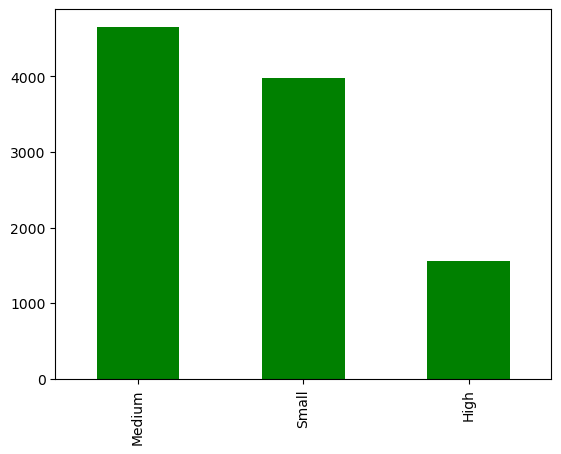

In [417]:
# visualizing the outlet_size
categorical_features["Outlet_Size"].value_counts().plot(kind='bar', color='green')

4. outlet_type

<AxesSubplot:>

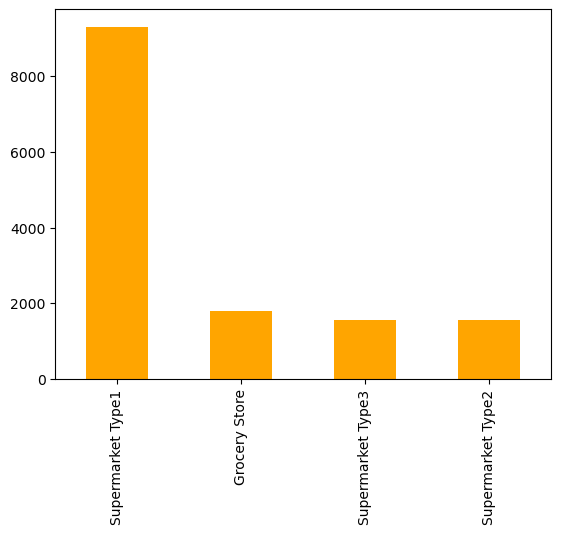

In [418]:
# visualizing the outlet_type
categorical_features['Outlet_Type'].value_counts().plot(kind='bar',color='orange')

In [419]:
X = data['Outlet_Establishment_Year']
X

0       1999
1       2007
2       1998
3       2007
4       1985
        ... 
8518    1987
8519    2002
8520    2004
8521    2009
8522    1997
Name: Outlet_Establishment_Year, Length: 14204, dtype: int64

In [420]:
X.value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

checking which columns contains missing values:


In [421]:
missing_values = data.isnull().sum()
missing_values

Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
source                          0
Item_Outlet_Sales               0
dtype: int64

In [422]:
train_missing_values = df2.isnull().sum()
train_missing_values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

In [423]:
total_cells = np.product(data.shape)
total_missing = missing_values.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

4.131358644171936


Item_Outlet_sales is our target variable and also we have more missing values in it.
Impute the missing values in Item_weight and Outlet_size .

no. of unique values in categorical variable

In [424]:
data.apply(lambda x: len(x.unique()))

Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
source                           2
Item_Outlet_Sales             3494
dtype: int64

In [425]:
# products = 1559
# stores = 10
# item_types = 16(point to be noted)

In [437]:
# frequency of categories
for col in categorical_features:
    print('\n%s column:'%col)
    print(data[col].value_counts())


Item_Fat_Content column:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Item_Type column:
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Outlet_Size column:
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

Outlet_Location_Type column:
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

Outlet_Type column:
Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Typ

In [428]:
import matplotlib.pyplot as plt
%matplotlib inline

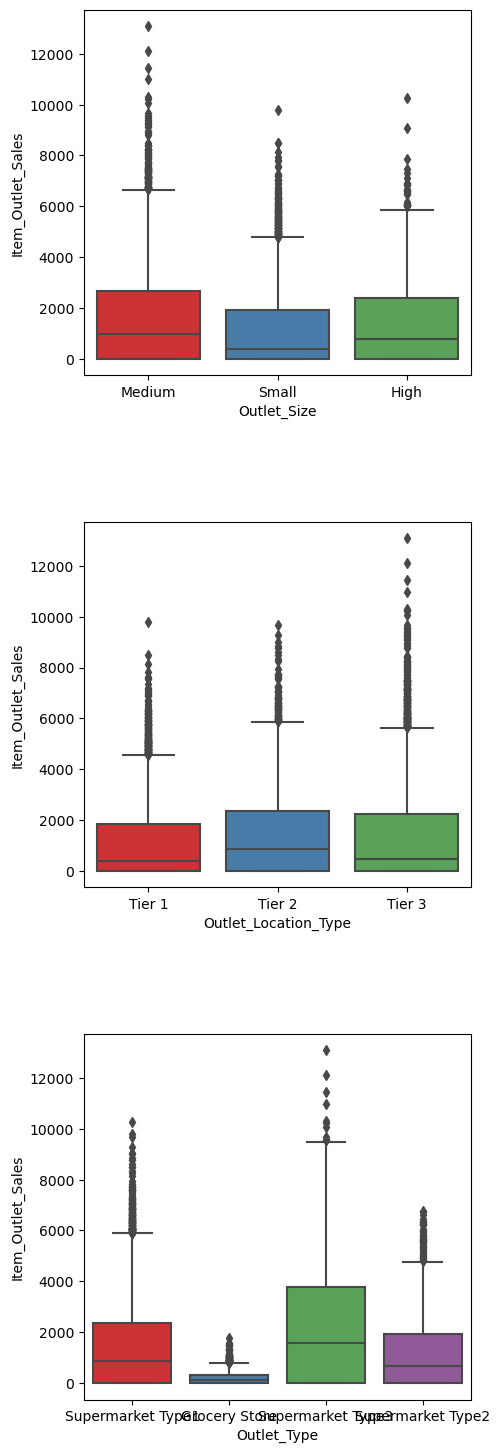

In [438]:

#Outlet_Size vs Item_Outlet_Sales
plt.figure(figsize = (5,10))

plt.subplot(311)
sns.boxplot(x='Outlet_Size',  y='Item_Outlet_Sales',data=data,palette="Set1")


#out_location_type vs  Item_Outlet_Sales
plt.subplot(312)
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales',data=data,palette='Set1')


#outlet_type vs  Item_Outlet_Sales
plt.subplot(313)
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',data=data,palette='Set1')

plt.subplots_adjust(wspace = 0.2, hspace = 0.4, top = 1.5)

plt.show()

In [439]:
plt.figure(figsize =(20,5))

<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

ValueError: Could not interpret input 'Outlet_Identifier'

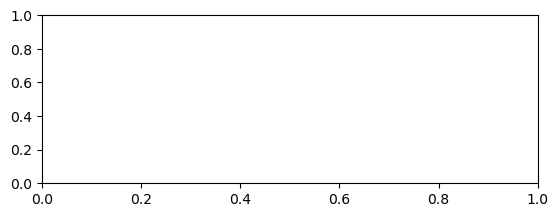

In [441]:
plt.subplot(211)
ax = sns.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=data, palette='Set1')
ax.set_title('Outlet_Identifier vs. Item_Outlet_Sales',fontsize=15)
ax.set_xlabel("",fontsize=5)
ax.set_ylabel('Item_Outlet_Sales',fontsize=15)


plt.subplot(212)
ax= sns.boxplot(x='Item_Type',y='Item_Outlet_Sales',data=data,palette='Set1')
ax.set_title('Item_Type vs. Item_Outlet_Sales',fontsize=15)
ax.set_xlabel("",fontsize=15)
ax.set_ylabel('Item_Outlet_Sales',fontsize=12)

plt.subplots_adjust(hspace=0.9,top=1.9)
plt.setp(ax.get_xticklabels(),rotation=60)

plt.show()

we found two variables with missingh values : Item_weight and Outlet_size. 
perform data cleaning and imputing missing values 

In [442]:
item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')

missing_values = data['Item_Weight'].isnull()
print('missing values: %d' %sum(missing_values))

data.loc[missing_values,'Item_Weight']= data.loc[missing_values,'Item_Identifier'].apply(lambda x: item_avg_weight.at[x,'Item_Weight'])
print('missing values after imputation %d' %sum(data['Item_Weight'].isnull()))

KeyError: 'Item_Identifier'

In [381]:
# here we have to import function
from scipy.stats import mode 

# determing the mode of each 
outlet_size_mode = data.pivot_table( values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:mode(x.astype('str')).mode[0]))
print('mode for each Outlet_Type:')
print(outlet_size_mode)

#get a boolean variable specifying missing Item_Weight values 
missing_values = data['Outlet_Size'].isnull()

#impute data and check #missing values before and after imputation to confirm
print('\n Original #missing :%d'%sum(missing_values))
data.loc[missing_values,'Outlet_Size']=data.loc[missing_values,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
print(sum(data['Outlet_Size'].isnull()))

KeyError: 'Outlet_Size'

modify item_visibility:
here minimum value is 0, which makes no practical sense. lets consider it like missing information and impute it with mean visibilty of the product.

In [382]:
# determine average visibility of a product
visibility_avg = data.pivot_table(values='Item_Visibility',index='Item_Identifier')

#impute 0 values with mean visibility of the product :
missing_values = (data['Item_Visibility']==0)

print('Number of 0  values initially: %d'%sum(missing_values))
data.loc[missing_values,'Item_Visibility'] = data.loc[missing_values,'Item_Identifier'].apply(lambda x: visibility_avg.at[x,'Item_Visibility'])
print('Number of 0 values after modification : %d'%sum(data['Item_Visibility'] == 0))

KeyError: 'Item_Identifier'

Create a broad category of Type of Item

Earlier we saw that the Item_Type variable has 16 categories which might prove to be very useful in analysis. So its a good idea to combine them. One way could be to manually assign a new category to each. But there’s a catch here. If you look at the Item_Identifier, i.e. the unique ID of each item, it starts with either FD, DR or NC. If you see the categories, these look like being Food, Drinks and Non-Consumables. So I’ve used the Item_Identifier variable to create a new column:

In [383]:
# get the first two characters if ID :
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
#rename them to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                            'NC':'Non-Consumable',
                                                            'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

KeyError: 'Item_Identifier'

Modify categories of Item_Fat_Content

We found typos and difference in representation in categories of Item_Fat_Content variable. This can be corrected as:

In [384]:
# change categories of low fat;
print('Original categories:')
print(data['Item_Fat_Content'].value_counts())

print('\nModified Categories:')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                            'reg':'Reegular',
                                                            'low fat':'Low Fat'})
print(data['Item_Fat_Content'].value_counts())


Original categories:


KeyError: 'Item_Fat_Content'

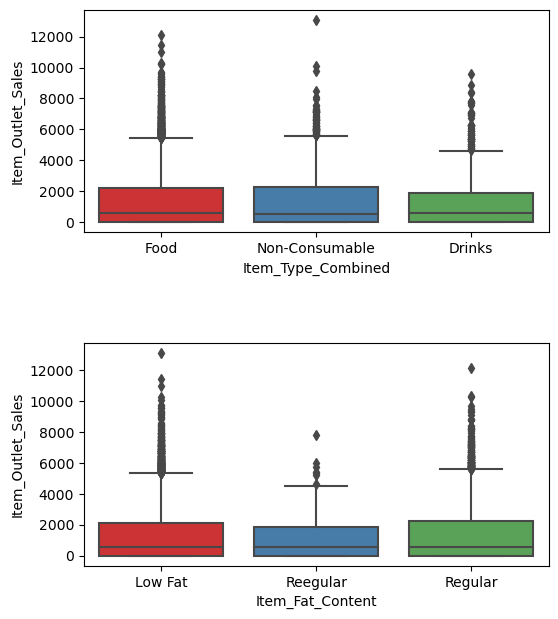

In [316]:
plt.figure(figsize = (6,4))

plt.subplot(211)
sns.boxplot(x='Item_Type_Combined',y='Item_Outlet_Sales',data=data,palette='Set1')

plt.subplot(212)
sns.boxplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=data,palette='Set1')

plt.subplots_adjust(wspace = 0.5, hspace =0.5, top=1.5)

plt.show()

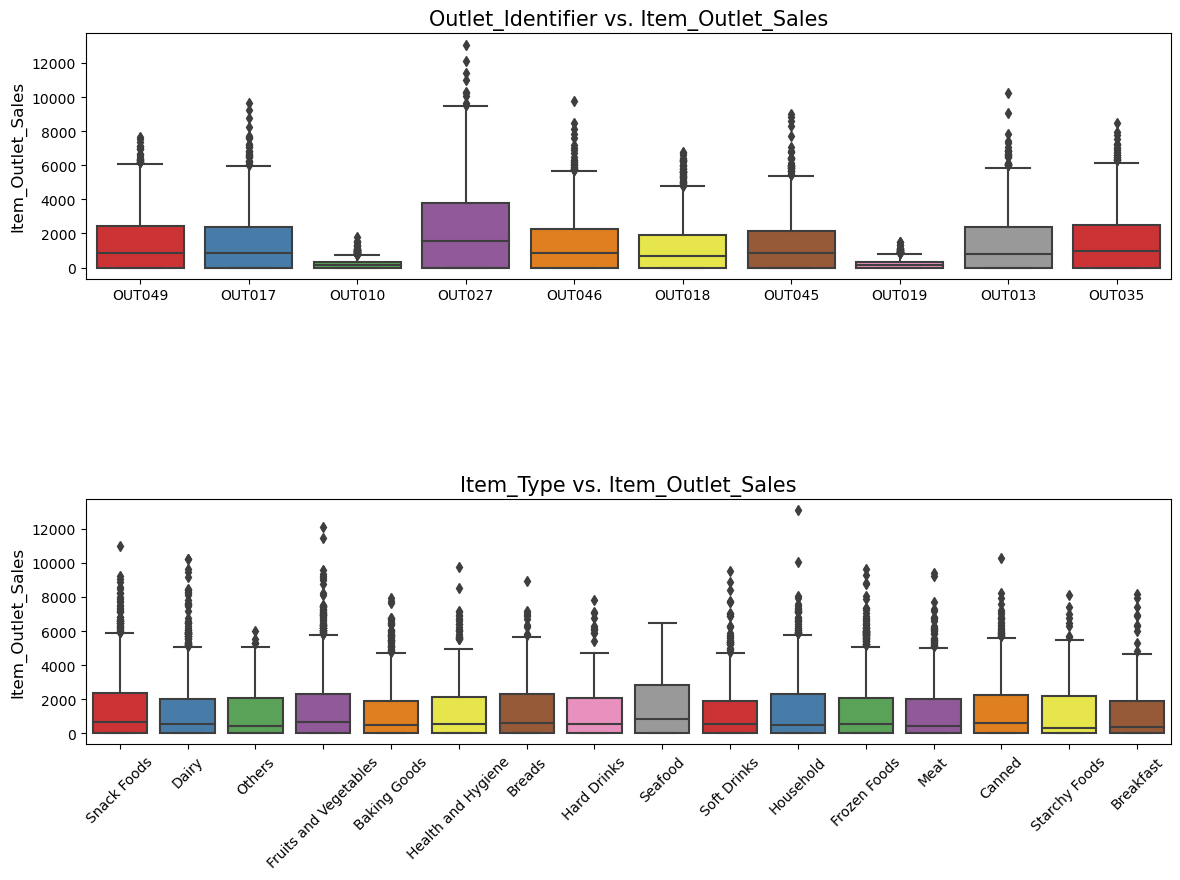

In [317]:
plt.figure(figsize = (14,9))

plt.subplot(211)
ax = sns.boxplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=data, palette="Set1")
ax.set_title("Outlet_Identifier vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplot(212)
ax = sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=data, palette="Set1")
ax.set_title("Item_Type vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplots_adjust(hspace = 0.9, top = 0.9)
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

In [318]:
print(X)
data.index = data['Outlet_Establishment_Year']
data.index


0       1999
1       2007
2       1998
3       2007
4       1985
        ... 
8518    1987
8519    2002
8520    2004
8521    2009
8522    1997
Name: Outlet_Establishment_Year, Length: 14204, dtype: int64


Int64Index([1999, 2007, 1998, 2007, 1985, 1997, 2009, 1985, 2002, 2007,
            ...
            2004, 2002, 2009, 2009, 1997, 1987, 2002, 2004, 2009, 1997],
           dtype='int64', name='Outlet_Establishment_Year', length=14204)

In [319]:
df2.pivot_table(index='Outlet_Type',values='Item_Outlet_Sales')

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


<AxesSubplot:xlabel='Outlet_Establishment_Year'>

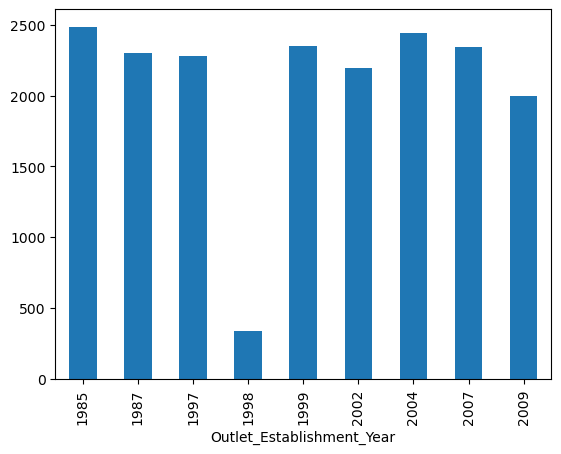

In [335]:
df2.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().plot.bar()

In [360]:
categorical_features

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FDW58,Low Fat,Snack Foods,OUT049,Medium,Tier 1,Supermarket Type1,Test
1,FDW14,Regular,Dairy,OUT017,NaN,Tier 2,Supermarket Type1,Test
2,NCN55,Low Fat,Others,OUT010,NaN,Tier 3,Grocery Store,Test
3,FDQ58,Low Fat,Snack Foods,OUT017,NaN,Tier 2,Supermarket Type1,Test
4,FDY38,Regular,Dairy,OUT027,Medium,Tier 3,Supermarket Type3,Test
...,...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1,Train
8519,FDS36,Regular,Baking Goods,OUT045,NaN,Tier 2,Supermarket Type1,Train
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1,Train
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2,Train


In [361]:
# print frequencies of  these categorical features
for col in categorical_features:
    print('frequency of categories for variable')
    print(df2[col].value_counts())
    print('\n')

frequency of categories for variable
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


frequency of categories for variable
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


frequency of categories for variable
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


frequency of categories for variable
OUT027    935
OUT013    932
OUT049   

In [336]:
data['Outlet_Years'] = 2009 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        11.169319
std          8.371664
min          0.000000
25%          5.000000
50%         10.000000
75%         22.000000
max         24.000000
Name: Outlet_Years, dtype: float64

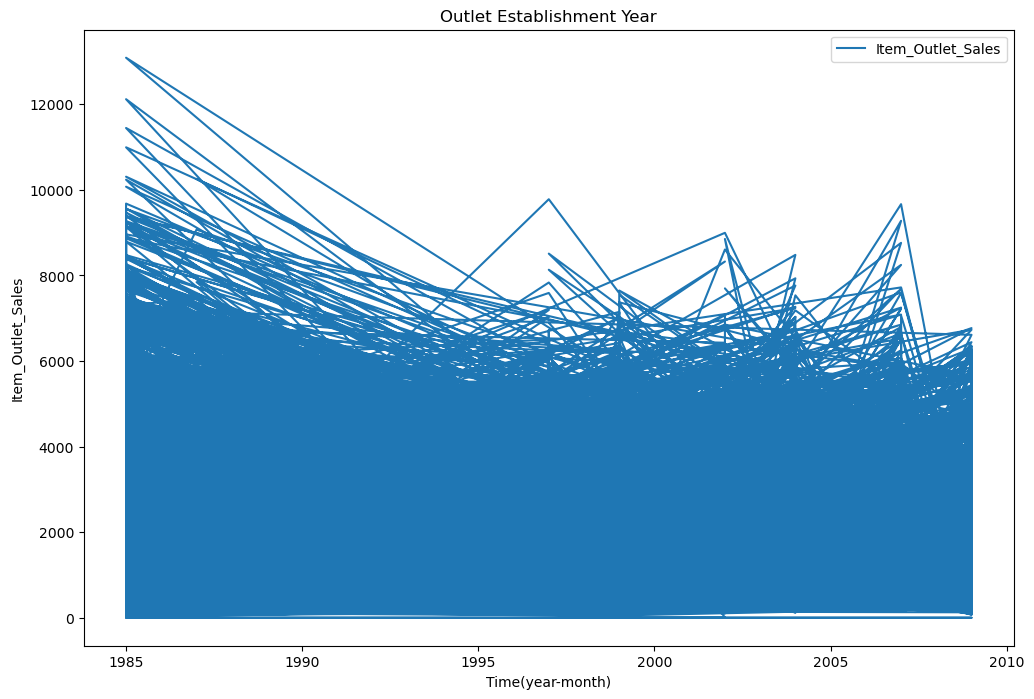

In [337]:
data.index = data['Outlet_Establishment_Year']
df = data.loc[:,['Item_Outlet_Sales']]
ts = df['Item_Outlet_Sales']
plt.figure(figsize=(12,8))
plt.plot(ts, label='Item_Outlet_Sales')
plt.title('Outlet Establishment Year')
plt.xlabel('Time(year-month)')
plt.ylabel('Item_Outlet_Sales')
plt.legend(loc = 'best')
plt.show()

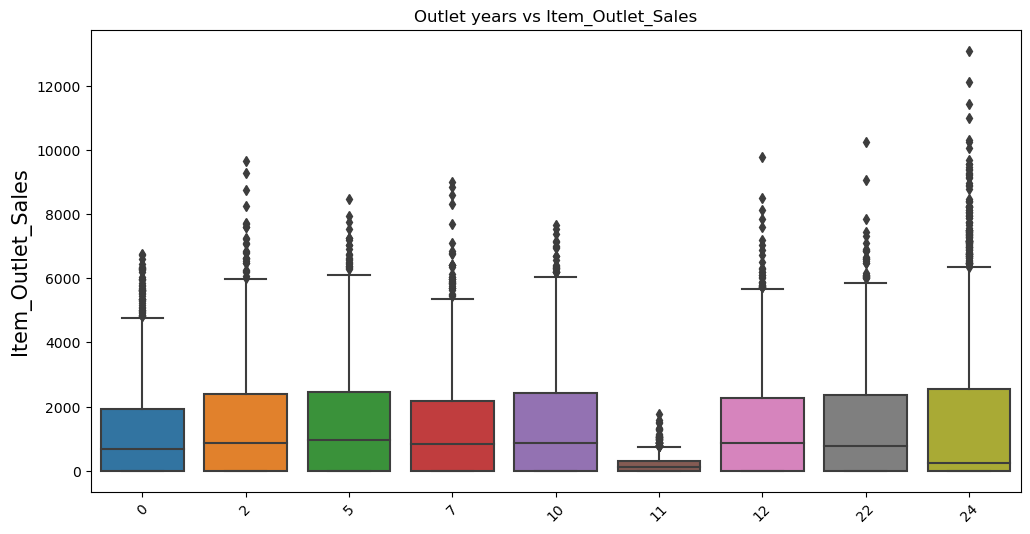

In [338]:
plt.figure(figsize = (12,6))
ax = sns.boxplot(x = 'Outlet_Years', y = 'Item_Outlet_Sales', data = data)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
ax.set_title('Outlet years vs Item_Outlet_Sales')
ax.set_xlabel('', fontsize = 15)
ax.set_ylabel('Item_Outlet_Sales', fontsize = 15)

plt.show()

In [339]:
temp_data = data.loc[data['Outlet_Establishment_Year'] == 1998]

In [340]:
temp_data['Outlet_Type'].value_counts()

KeyError: 'Outlet_Type'

In [334]:
test_temp_data = data.loc[data['Outlet_Establishment_Year'] == 1998]
test_temp_data['Outlet_Type'].value_counts()

KeyError: 'Outlet_Type'

In [333]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

KeyError: 'Item_Fat_Content'

In [331]:
#One Hot Coding:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet'])

KeyError: "None of [Index(['Item_Fat_Content', 'Outlet_Location_Type', 'Outlet_Size',\n       'Outlet_Type', 'Item_Type_Combined', 'Outlet'],\n      dtype='object')] are in the [columns]"

In [332]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
source                        object
Item_Outlet_Sales            float64
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Size_3                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
O

In [277]:
#Drop the columns which have been converted to different types:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

#Divide into test and train:
df2 = data.loc[data['source']=="train"]
df = data.loc[data['source']=="test"]

#Drop unnecessary columns:
df.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
df2.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
df2.to_csv("train_modified.csv",index=False)
df.to_csv("test_modified.csv",index=False)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12260\1042828532.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_12260\1042828532.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(['source'],axis=1,inplace=True)
